In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import glob
from PIL import Image
import cv2
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

Dataset taken from:
https://www.kaggle.com/ankitesh97/pokemon-images/version/1

In [2]:
width = 64
height = 64
dataset_size = 8000

path = 'pokemon'
files = [f for f in glob.glob(path + '/*.jpg')]
original = [f for f in files if 'flipped' not in f and 'rotated' not in f]
print(len(original))

data = []
edges = []

for file in original[:dataset_size]:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img, dsize=(width, height), interpolation=cv2.INTER_CUBIC)
    data.append(resized)
    edges.append(cv2.Canny(resized, width, height))
    
data = np.array(data)
edges = np.array(edges)

print('data shape:', data.shape)
print('edges shape:', edges.shape)

819
data shape: (819, 64, 64, 3)
edges shape: (819, 64, 64)


In [3]:
mnist = pd.read_csv('fashionmnist/fashion-mnist_test.csv')
mnist

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [4]:
data = mnist.iloc[:, 1:].values.reshape(-1, 28, 28)
data.shape

(10000, 28, 28)

<IPython.core.display.Javascript object>


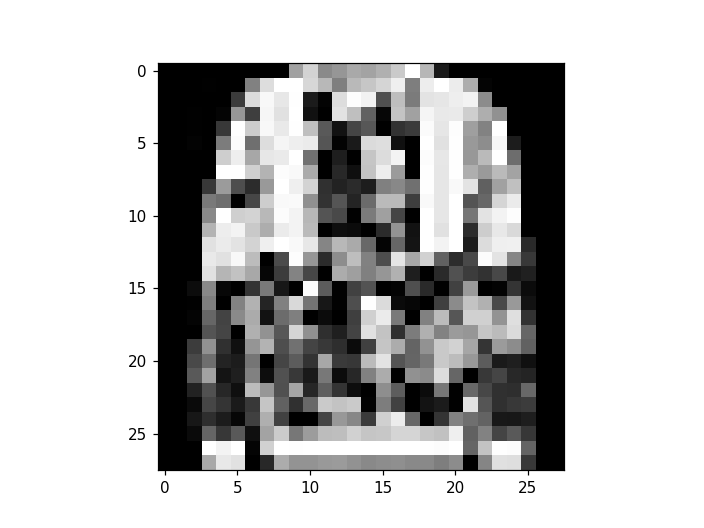

In [7]:
plt.imshow(data[3], cmap='gray')
plt.show()

In [177]:
for i, name in enumerate(original):
    if '234.jpg' in name:
        print(i, name)

499 pokemon/234.jpg


<IPython.core.display.Javascript object>


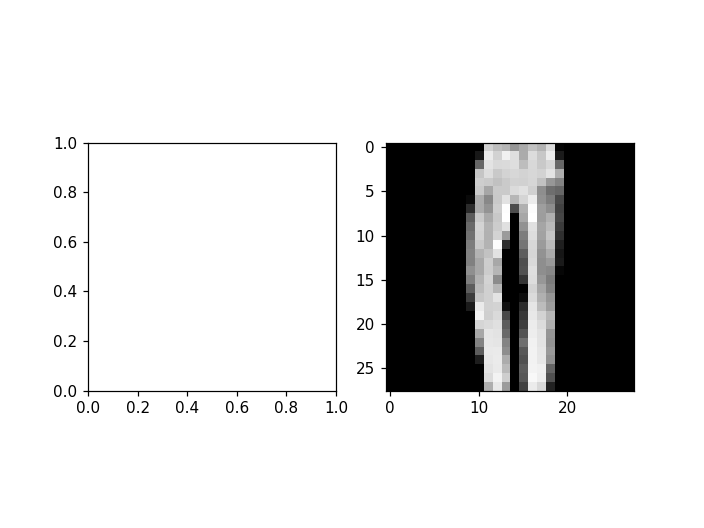

TypeError: Invalid dimensions for image data

In [198]:
f, ax = plt.subplots(1, 2)
ax[0].imshow(data[499])
ax[1].imshow(edges[0])

In [9]:
def imscatter(x, y, images, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()

    im = [OffsetImage(i, zoom=zoom) for i in images]
    x, y = np.atleast_1d(x, y)
    artists = []
    
    for x0, y0, i in zip(x, y, im):
        ab = AnnotationBbox(i, (x0, y0), xycoords='data', frameon=True)
        artists.append(ax.add_artist(ab))
        
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

In [10]:
def plot_random(x, y, images, n, zoom):
    size = len(images)
    
    indices = np.random.choice(np.arange(size), n, replace=False)
    x_sample = x[indices]
    y_sample = y[indices]
    img_sample = images[indices]
    
    return imscatter(x_sample, y_sample, img_sample, zoom=zoom)

<IPython.core.display.Javascript object>


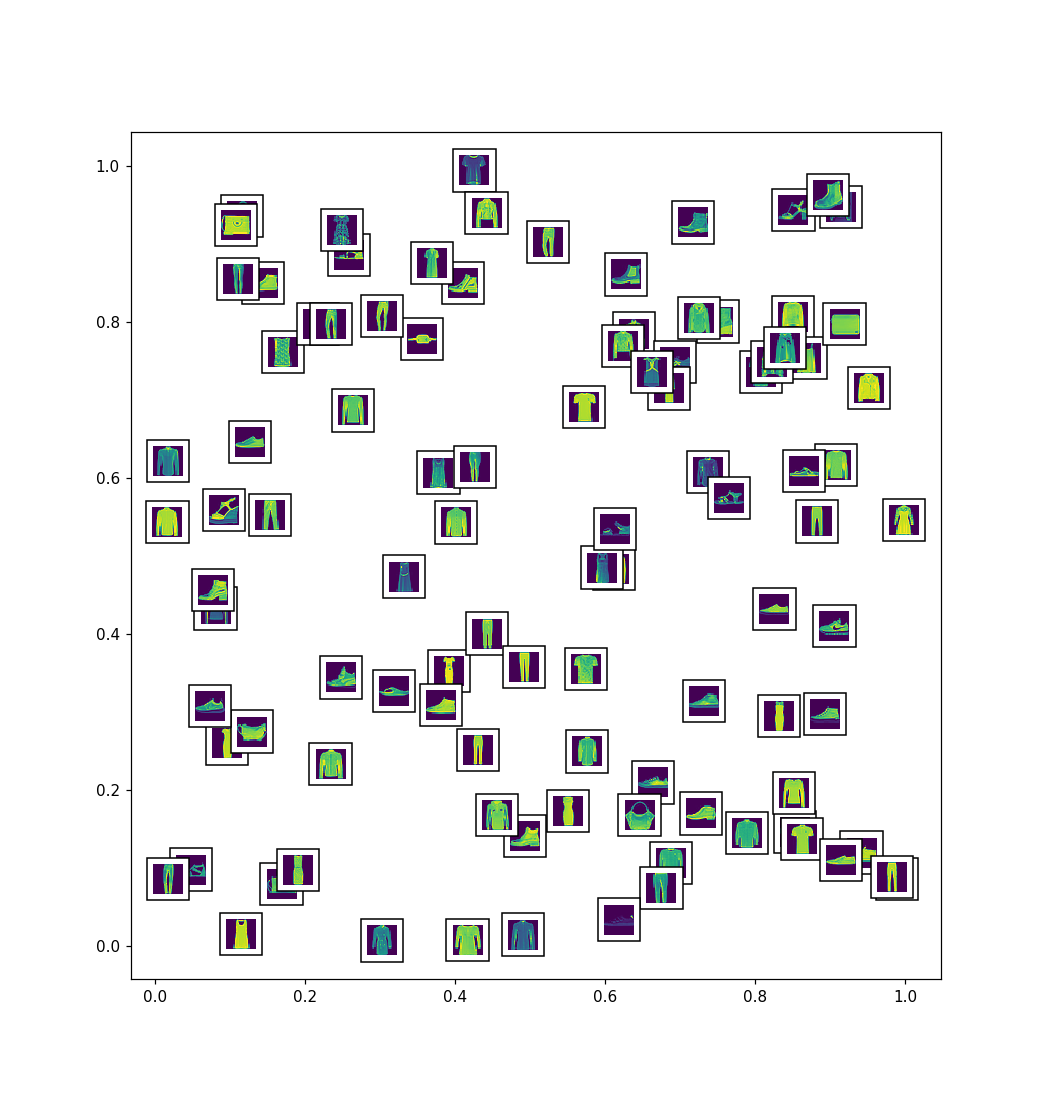

In [11]:
plt.figure(figsize=(9.5, 10))
fig = plot_random(
    np.random.rand(dataset_size),
    np.random.rand(dataset_size),
    data[:dataset_size],
    100,
    zoom=0.7)

In [12]:
flat_data = data.reshape(-1, width*height*3)
flat_edges = edges.reshape(-1, width*height)

scaled_data = StandardScaler().fit_transform(flat_data)
scaled_edges = StandardScaler().fit_transform(flat_edges)

scaled_edges.shape

ValueError: cannot reshape array of size 7840000 into shape (12288)

In [14]:
pca = PCA(n_components=2)
comp = pca.fit_transform(data)
comp_df = pd.DataFrame(data=comp)
comp_df.head()

ValueError: Found array with dim 3. Estimator expected <= 2.

In [8]:
%matplotlib notebook
plt.figure(figsize=(9.5, 10))
fig = plot_random(
    comp_df['pc1'],
    comp_df['pc2'],
    data,
    200,
    zoom=0.4)

Traceback (most recent call last):
  File "/home/mateusz/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/mateusz/.local/lib/python3.6/site-packages/matplotlib/backends/backend_nbagg.py", line 236, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "/home/mateusz/.local/lib/python3.6/site-packages/matplotlib/_pylab_helpers.py", line 54, in destroy
    cls._activeQue.remove(manager)
ValueError: list.remove(x): x not in list
Traceback (most recent call last):
  File "/home/mateusz/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/mateusz/.local/lib/python3.6/site-packages/matplotlib/backends/backend_nbagg.py", line 236, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "/home/mateusz/.local/lib/python3.6/site-packages/matplotlib/_pylab_helpers.py", line 54, in

<IPython.core.display.Javascript object>

NameError: name 'plot_random' is not defined

In [163]:
kpca = KernelPCA(n_components=2, kernel='rbf')
comp = kpca.fit_transform(scaled_data)
comp_df = pd.DataFrame(data=comp, columns=['pc1', 'pc2'])
comp_df.head()

,pc1,pc2
0,0.280573,0.104434
1,0.220767,0.037087
2,0.088954,0.090579
3,0.098863,0.080007
4,-0.139562,0.122475


<IPython.core.display.Javascript object>


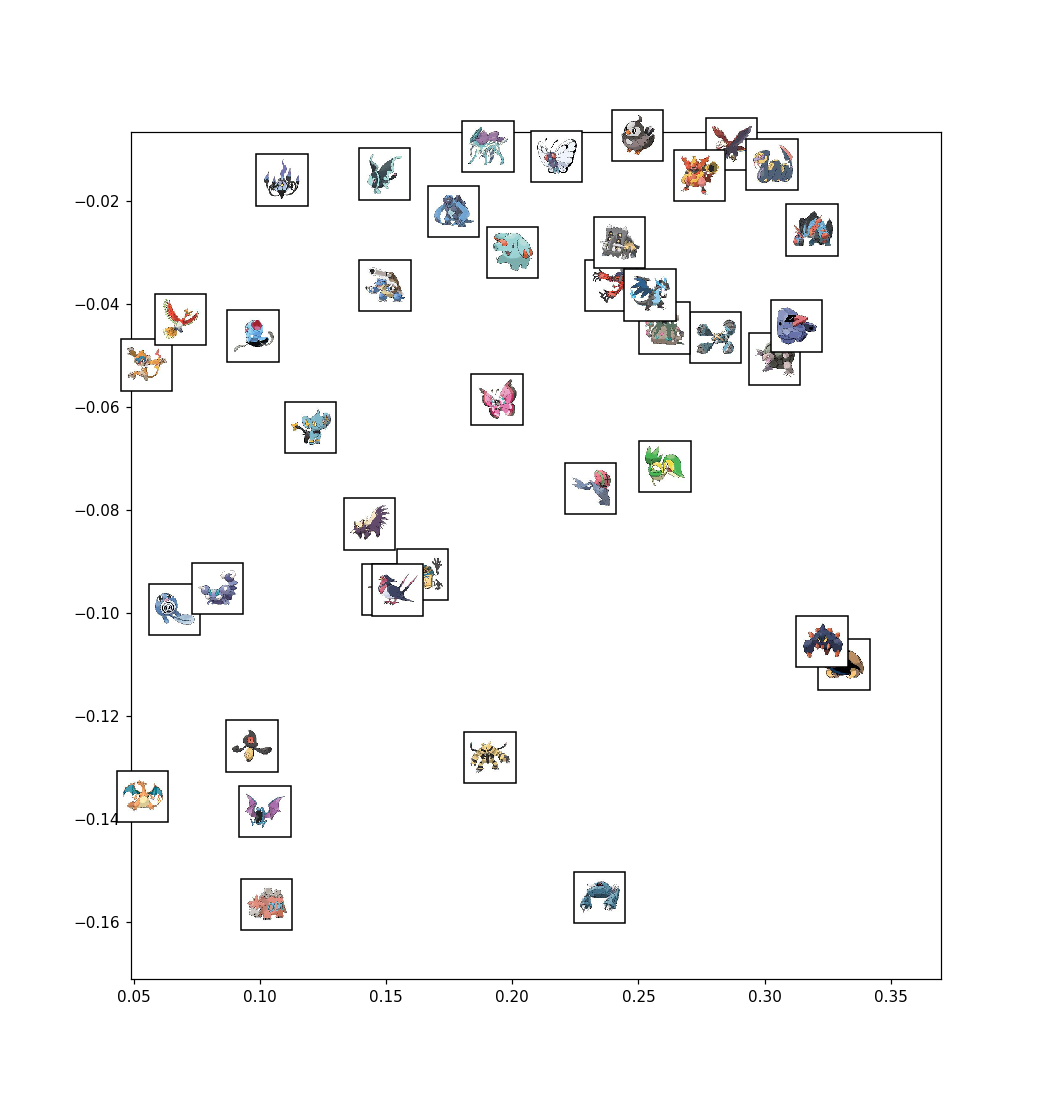

In [164]:
%matplotlib notebook
plt.figure(figsize=(9.5, 10))
fig = plot_random(
    comp_df['pc1'],
    comp_df['pc2'],
    data,
    200,
    zoom=0.4)

In [165]:
kpca = KernelPCA(n_components=2, kernel='rbf')
comp = kpca.fit_transform(scaled_edges)
comp_df = pd.DataFrame(data=comp, columns=['pc1', 'pc2'])
comp_df.head()

,pc1,pc2
0,-0.009310,0.093325
1,-0.018633,0.042961
2,0.078798,0.049105
3,-0.071694,0.052726
4,-0.054769,0.026893


<IPython.core.display.Javascript object>


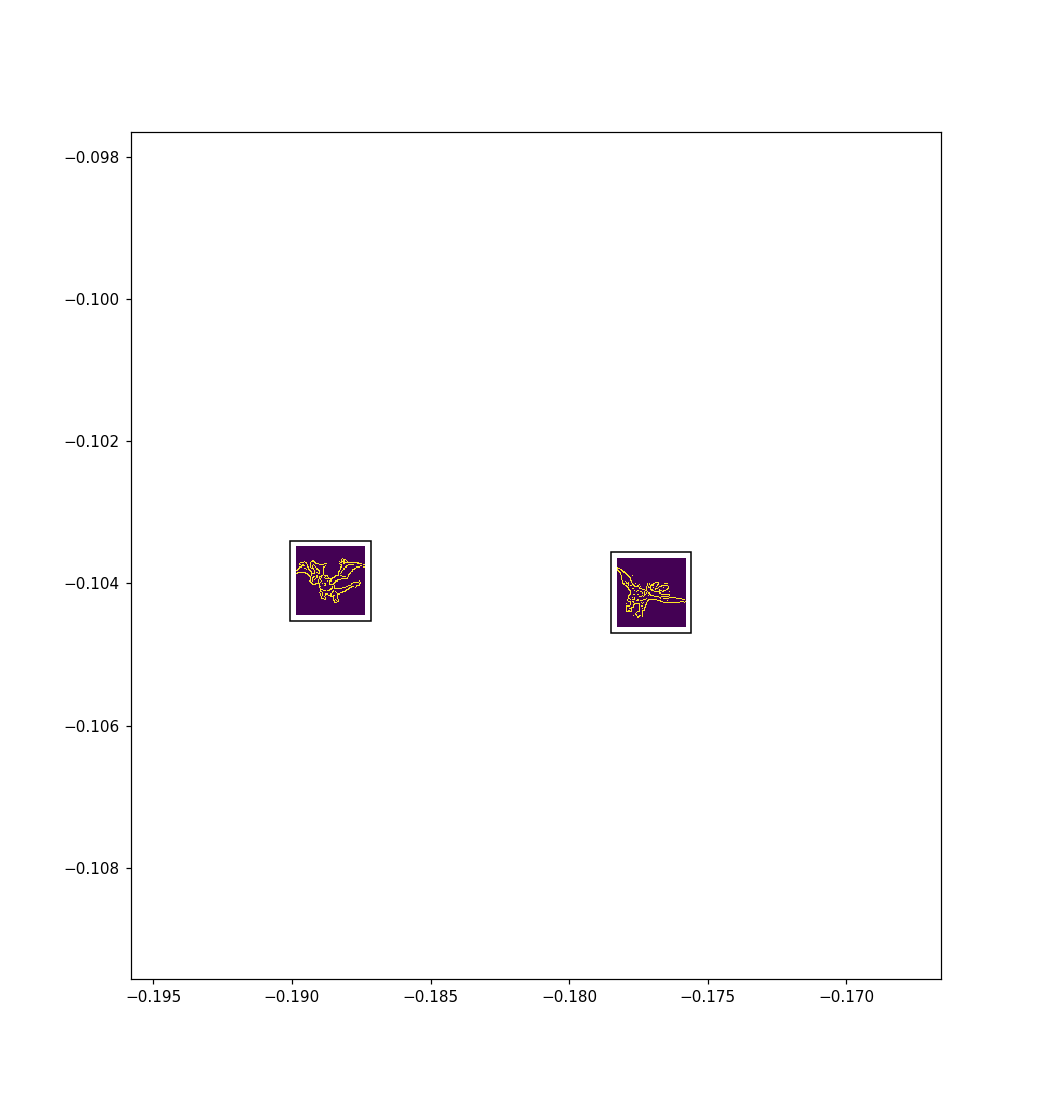

In [181]:
%matplotlib notebook
plt.figure(figsize=(9.5, 10))
fig = plot_random(
    comp_df['pc1'],
    comp_df['pc2'],
    edges,
    200,
    zoom=0.7)

[[ 22 751 544  58 761 794 193 242 609 326]]


<IPython.core.display.Javascript object>


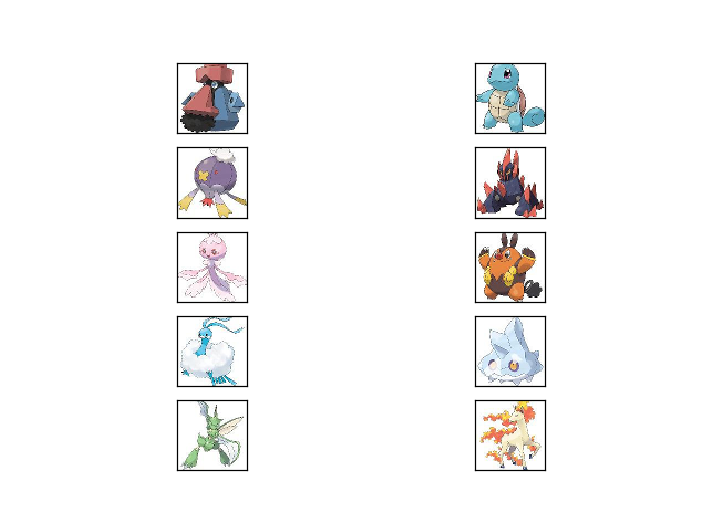

In [175]:
fig = plot_nearest(comp_df.values[22], comp_df.values, data, 10, (5, 2))

In [131]:
def plot_nearest(origin, data, images, n, shape):
    
    nbrs = NearestNeighbors(n_neighbors=n, algorithm='brute').fit(data)
    distances, indices = nbrs.kneighbors(np.atleast_2d(origin))
    
    print(indices)
    
    fig, axes = plt.subplots(shape[0], shape[1])
    axes = axes.flatten()
    
    for i, img in enumerate(images[indices.flatten()]):
        axes[i].imshow(img)
        axes[i].get_xaxis().set_visible(False)
        axes[i].get_yaxis().set_visible(False)
        
    return fig

In [120]:
comp_df.values

array([[ 0.01871787, -0.05192159],
       [ 0.08440425, -0.01856554],
       [ 0.01919163, -0.09955551],
       ...,
       [-0.08070956, -0.02113983],
       [-0.17735656,  0.06343731],
       [-0.07562544, -0.16558566]])

In [121]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='brute').fit(comp_df.values)
distances, indices = nbrs.kneighbors(np.atleast_2d(comp_df.values[0]))

[[499 434 196  95 450 466 549  63 370  80]]


<IPython.core.display.Javascript object>


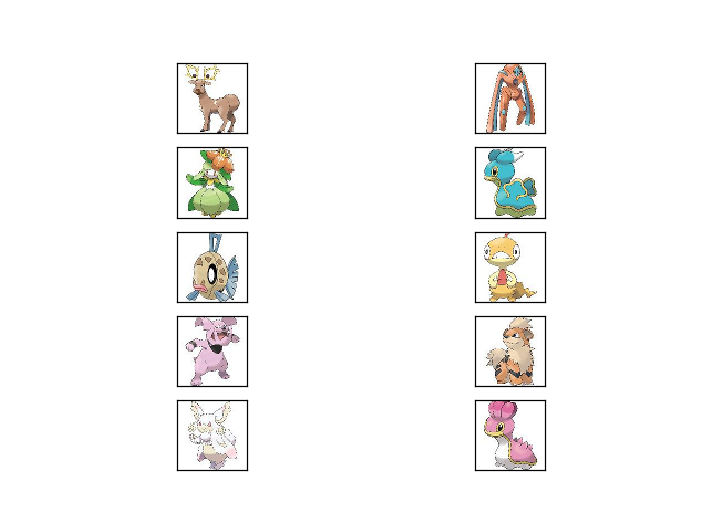

In [179]:
fig = plot_nearest(comp_df.values[499], comp_df.values, data, 10, (5, 2))